In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #For Plotting data



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/metro-systems-worldwide/Metro-Systems-Worldwide.csv


In [2]:
raw_data = pd.read_csv('/kaggle/input/metro-systems-worldwide/Metro-Systems-Worldwide.csv')
raw_data.head()

,City,Country\r\nregion,Name,Service\r\nopened,Last\r\nexpanded,Stations,System length,Annual ridership\r\n(millions)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019)
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020)
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022)
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022)
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019)


In [3]:
#checking the data for missing values
raw_data.isna().sum()

City                               0
Country\r\nregion                  0
Name                               0
Service\r\nopened                  0
Last\r\nexpanded                   0
Stations                           0
System length                      0
Annual ridership\r\n(millions)    16
dtype: int64

In [4]:
#Drop rows with missing values of Annual Ridership
raw_data = raw_data.dropna(axis=0)

In [5]:
raw_data.head()

,City,Country\r\nregion,Name,Service\r\nopened,Last\r\nexpanded,Stations,System length,Annual ridership\r\n(millions)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019)
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020)
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022)
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022)
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019)


In [6]:
raw_data["Annual ridership\r\n(millions)"][0]

'45.3 (2019)'

In [7]:
#Preprocessing the data
last_ridership =  np.array(raw_data["Annual ridership\r\n(millions)"])
last_ridership = [eachRidership[:(None if '(' not in eachRidership else eachRidership.index('('))] for eachRidership in last_ridership ]
last_ridership = [x.replace(',','') for x in last_ridership]
last_ridership = np.array(last_ridership,dtype=np.float32)
raw_data["Last Ridership"] = last_ridership

In [8]:
system_length_km = np.array(raw_data["System length"])
system_length_km = [lengthKm[:(None if '(' not in lengthKm else lengthKm.index('km'))] for lengthKm in system_length_km ]

system_length_km = [x.strip('\xa0') for x in system_length_km]
system_length_km = np.array(system_length_km,dtype=np.float32())
raw_data["System Length Km"] = system_length_km

In [9]:
from datetime import datetime
Year = datetime.now().year
raw_data["Age"] = Year - raw_data["Service\r\nopened"]

raw_data.head()

,City,Country\r\nregion,Name,Service\r\nopened,Last\r\nexpanded,Stations,System length,Annual ridership\r\n(millions),Last Ridership,System Length Km,Age
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019),45.299999,18.500000,12
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020),74.000000,56.700001,110
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022),23.299999,12.100000,42
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022),16.299999,36.000000,4
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019),459.799988,83.300003,45


In [10]:
data = raw_data.copy()
data = data.drop(["System length","Annual ridership\r\n(millions)"],axis = 1)
data.head()

,City,Country\r\nregion,Name,Service\r\nopened,Last\r\nexpanded,Stations,Last Ridership,System Length Km,Age
0,Algiers,Algeria,Algiers Metro,2011,2018,19,45.299999,18.500000,12
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,74.000000,56.700001,110
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,23.299999,12.100000,42
3,Sydney,Australia,Sydney Metro,2019,–,13,16.299999,36.000000,4
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,459.799988,83.300003,45


In [11]:
data.columns.values

array(['City', 'Country\r\nregion', 'Name', 'Service\r\nopened',
       'Last\r\nexpanded', 'Stations', 'Last Ridership',
       'System Length Km', 'Age'], dtype=object)

In [12]:
data = data[['City', 'Country\r\nregion', 'Name', 'Service\r\nopened',
       'Last\r\nexpanded','System Length Km', 'Age', 'Stations', 'Last Ridership']]
data

,City,Country\r\nregion,Name,Service\r\nopened,Last\r\nexpanded,System Length Km,Age,Stations,Last Ridership
0,Algiers,Algeria,Algiers Metro,2011,2018,18.500000,12,19,45.299999
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,56.700001,110,78,74.000000
2,Yerevan,Armenia,Yerevan Metro,1981,1996,12.100000,42,10,23.299999
3,Sydney,Australia,Sydney Metro,2019,–,36.000000,4,13,16.299999
4,Vienna,Austria,Vienna U-Bahn,1978,2017,83.300003,45,98,459.799988
...,...,...,...,...,...,...,...,...,...
200,San Juan,United States,Tren Urbano,2004,2005,17.200001,19,16,2.500000
201,"Washington, D.C.",United States,Washington Metro,1976,2023,206.000000,47,98,93.000000
202,Tashkent,Uzbekistan,Tashkent Metro,1977,2023,59.099998,46,48,136.699997
203,Caracas,Venezuela,Caracas Metro,1983,2015,67.199997,40,49,358.000000


In [13]:
data["Ridership Density Per Km"] = data["Last Ridership"] / data["System Length Km"]
data["Ridership Density Per Station"] = data["Last Ridership"] / data["Stations"]
data.columns.values

array(['City', 'Country\r\nregion', 'Name', 'Service\r\nopened',
       'Last\r\nexpanded', 'System Length Km', 'Age', 'Stations',
       'Last Ridership', 'Ridership Density Per Km',
       'Ridership Density Per Station'], dtype=object)

In [14]:
data["log_ride_dense_km"] = np.log(data["Ridership Density Per Km"])
data["log_ride_dense_station"] = np.log(data["Ridership Density Per Station"])
data["log_age"] = np.log(data["Age"])
data = data[['City', 'Country\r\nregion', 'Name', 'Service\r\nopened',
       'Last\r\nexpanded','Ridership Density Per Km','log_ride_dense_km',
       'Ridership Density Per Station','log_ride_dense_station', 'System Length Km', 'Age','log_age', 'Stations',
       'Last Ridership']]

data.head()
data.reset_index()


,index,City,Country\r\nregion,Name,Service\r\nopened,Last\r\nexpanded,Ridership Density Per Km,log_ride_dense_km,Ridership Density Per Station,log_ride_dense_station,System Length Km,Age,log_age,Stations,Last Ridership
0,0,Algiers,Algeria,Algiers Metro,2011,2018,2.448649,0.895536,2.384210,0.868868,18.500000,12,2.484907,19,45.299999
1,1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,1.305115,0.266291,0.948718,-0.052644,56.700001,110,4.700480,78,74.000000
2,2,Yerevan,Armenia,Yerevan Metro,1981,1996,1.925620,0.655248,2.330000,0.845868,12.100000,42,3.737670,10,23.299999
3,3,Sydney,Australia,Sydney Metro,2019,–,0.452778,-0.792354,1.253846,0.226216,36.000000,4,1.386294,13,16.299999
4,4,Vienna,Austria,Vienna U-Bahn,1978,2017,5.519807,1.708343,4.691837,1.545824,83.300003,45,3.806662,98,459.799988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,200,San Juan,United States,Tren Urbano,2004,2005,0.145349,-1.928619,0.156250,-1.856298,17.200001,19,2.944439,16,2.500000
185,201,"Washington, D.C.",United States,Washington Metro,1976,2023,0.451456,-0.795277,0.948980,-0.052368,206.000000,47,3.850148,98,93.000000
186,202,Tashkent,Uzbekistan,Tashkent Metro,1977,2023,2.313029,0.838558,2.847917,1.046588,59.099998,46,3.828641,48,136.699997
187,203,Caracas,Venezuela,Caracas Metro,1983,2015,5.327381,1.672860,7.306122,1.988713,67.199997,40,3.688879,49,358.000000


In [15]:
data.describe()

,Service\r\nopened,Ridership Density Per Km,log_ride_dense_km,Ridership Density Per Station,log_ride_dense_station,System Length Km,Age,log_age,Stations,Last Ridership
count,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000
mean,1986.26455,2.661091,0.506562,3.297886,0.739588,104.857529,36.73545,3.201451,73.306878,307.499451
std,32.09782,2.631698,1.128217,3.184497,1.089485,136.116714,32.09782,0.967740,78.169966,535.360535
min,1863.00000,0.010565,-4.550186,0.012903,-4.350278,4.100000,2.00000,0.693147,6.000000,0.400000
25%,1975.00000,0.965517,-0.035091,1.250000,0.223144,29.700001,12.00000,2.484907,22.000000,36.980000
50%,1994.00000,1.925620,0.655248,2.281081,0.824650,53.099998,29.00000,3.367296,45.000000,100.000000
75%,2011.00000,3.547688,1.266296,4.246154,1.446014,114.800003,48.00000,3.871201,94.000000,254.000000
max,2021.00000,19.658537,2.978512,19.418309,2.966216,795.500000,160.00000,5.075174,424.000000,2834.689941


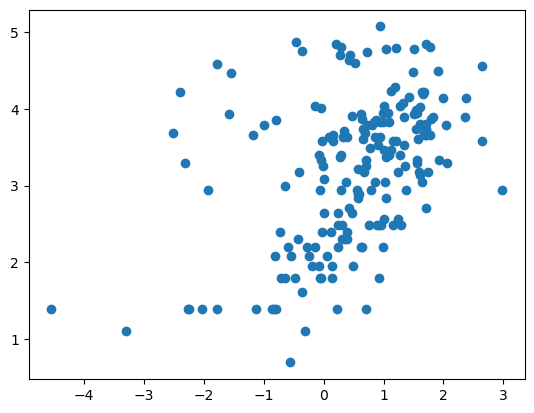

In [16]:
plt.scatter(data["log_ride_dense_km"],data["log_age"])

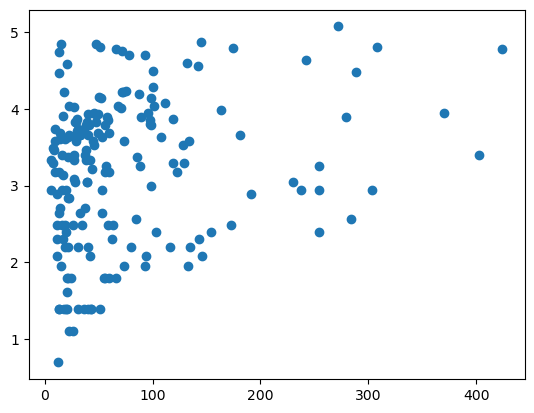

In [17]:
plt.scatter(data["Stations"],data["log_age"])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data[['log_ride_dense_km','Stations']]
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.34568429, -0.69657341],
       [-0.21353138,  0.06019686],
       [ 0.13213795, -0.81201294],
       [-1.15435787, -0.7735331 ],
       [ 1.06803232,  0.31672916]])

In [19]:
Y = data["log_age"]

In [20]:
Y[:5]

0    2.484907
1    4.700480
2    3.737670
3    1.386294
4    3.806662
Name: log_age, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

import statsmodels.api as sm

X_train_OLS = sm.add_constant(X_train)
model_OLS = sm.OLS(Y_train,X_train_OLS)
result = model_OLS.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_age   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     16.45
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           3.54e-07
Time:                        12:43:59   Log-Likelihood:                -191.90
No. Observations:                 151   AIC:                             389.8
Df Residuals:                     148   BIC:                             398.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.9184      0.098     29.779      0.000       2.725       3.112
log_ride_dense_km     0.2891      0.061      4.719      0.000       0.168       0.410
Stations              0.0019      0.001      2.090      0.038       0.000       0.004
==============================================================================
Omnibus:                        1.358   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.267
Skew:                           0.091   Prob(JB):                        0.531
Kurtosis:                       2.590   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.coef_

array([0.28910401, 0.00191836])

In [23]:
#Predict Values
Y_pred = model.predict(X_test)
X_test.columns.values

array(['log_ride_dense_km', 'Stations'], dtype=object)

In [24]:
from sklearn.metrics import r2_score
r2_s = r2_score(Y_test,Y_pred)

predictions = pd.DataFrame(data = X_test, columns = ['log_ride_dense_km', 'Stations'])

In [25]:
predictions["Actual Age"] = np.exp(Y_test)
predictions["Predicted Age"] = np.exp(Y_pred)
predictions

,log_ride_dense_km,Stations,Actual Age,Predicted Age
18,1.266296,68,57.0,30.415598
25,-0.861902,43,4.0,15.669654
61,0.787099,254,19.0,37.834917
44,0.057769,94,8.0,22.543410
158,0.315031,15,38.0,20.869069
133,0.566514,22,17.0,22.746275
159,1.581375,14,37.0,30.037744
83,0.983457,96,52.0,29.574124
104,0.301585,35,12.0,21.601178
100,-1.781709,21,4.0,11.514443
